<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import numpy as np

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [105]:
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The dataset provides information on Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered through the Washington State Department of Licensing (DOL). Here's a summary of the columns:

1. VIN (1-10): Vehicle Identification Number.
2. County: County where the vehicle is registered.
3. City: City where the vehicle is registered.
4. State: State where the vehicle is registered.
5. Postal Code: Postal code of the registration location.
6. Model Year: The year the vehicle model was manufactured.
7. Make: The manufacturer of the vehicle.
8. Model: The model of the vehicle.
9. Electric Vehicle Type: Specifies whether the vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV).
10. Clean Alternative Fuel Vehicle (CAFV) Eligibility: Indicates if the vehicle is eligible for Clean Alternative Fuel Vehicle status.
11. Electric Range: The range the vehicle can travel on electric power alone.
12. Base MSRP: Manufacturer's suggested retail price for the vehicle.
13. Legislative District: Legislative district where the vehicle is registered.
14. DOL Vehicle ID: Unique identifier assigned by the Department of Licensing.
15. Vehicle Location: Location of the vehicle.
16. Electric Utility: The utility company providing electricity to the vehicle's location.
17. 2020 Census Tract: Census tract of the vehicle's location as of the 2020 Census.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34837 entries, 0 to 34836
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         34837 non-null  object 
 1   County                                             34837 non-null  object 
 2   City                                               34837 non-null  object 
 3   State                                              34837 non-null  object 
 4   Postal Code                                        34837 non-null  int64  
 5   Model Year                                         34837 non-null  int64  
 6   Make                                               34836 non-null  object 
 7   Model                                              34836 non-null  object 
 8   Electric Vehicle Type                              34836 non-null  object 
 9   Clean 

In [5]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 1
Model                                                1
Electric Vehicle Type                                1
Clean Alternative Fuel Vehicle (CAFV) Eligibility    1
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 1
DOL Vehicle ID                                       1
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64

# 2. Objectives


The main objective of this analysis is interpretation rather than prediction. We aim to understand the factors influencing the electric vehicle market, particularly in terms of their registration patterns, including the effects of attributes like model year, make, range, and location on their registration counts.

#### Data Cleaning and Exploration

In [7]:
# Drop rows with null values 
data = data.dropna(subset=['Make', 'Model', 'Electric Vehicle Type', 
                                       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP',
                                       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
                                          'Electric Utility', '2020 Census Tract'])

In [8]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [9]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,34836.000000,34836.000000,34836.000000,34836.000000,34836.0000,3.483600e+04,3.483600e+04
mean,98176.578023,2020.628373,58.813871,1063.928694,32.0000,2.210270e+08,5.303344e+10
std,211.741663,2.931420,91.841390,8225.837420,14.6925,7.539077e+07,1.170438e+07
min,98001.000000,2000.000000,0.000000,0.000000,1.0000,2.770200e+04,5.300796e+10
25%,98034.000000,2019.000000,0.000000,0.000000,18.0000,1.832627e+08,5.303301e+10
50%,98109.000000,2022.000000,0.000000,0.000000,36.0000,2.287242e+08,5.303302e+10
75%,98188.000000,2023.000000,81.000000,0.000000,45.0000,2.544216e+08,5.303303e+10
max,99362.000000,2024.000000,337.000000,184400.000000,49.0000,4.789259e+08,5.307794e+10


In [10]:
import matplotlib.pyplot as plt

# Data
vehicle_type_counts = data['Electric Vehicle Type'].value_counts()
make_counts = data['Make'].value_counts().head(20)  # Top 20 manufacturers

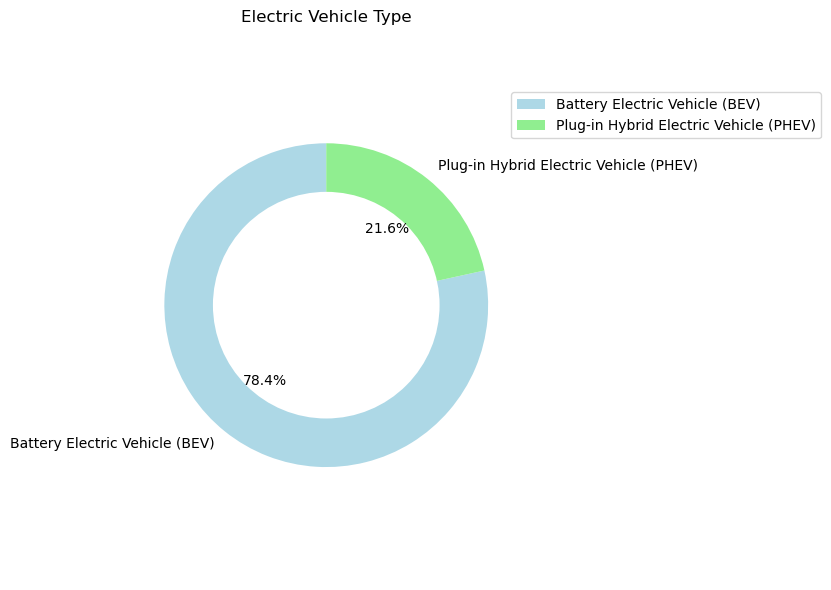

In [11]:
# Calculate percentages
percentages = (vehicle_type_counts / vehicle_type_counts.sum()) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Doughnut chart for Electric Vehicle Type
plt.subplot(1, 2, 1)
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['lightblue', 'lightgreen'])
plt.title('Electric Vehicle Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle



# Add a circle at the center to transform the pie chart into a doughnut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



# Add a legend with percentages
plt.legend(labels=percentages.index, loc='upper left', bbox_to_anchor=(1, 0.9))

plt.tight_layout()
plt.show()

In [12]:
import seaborn as sns

# Grouping data by city and electric vehicle type and counting the number of vehicles in each group
city_vehicle_counts = data.groupby(['City', 'Electric Vehicle Type']).size().unstack(fill_value=0)

In [13]:
city_vehicle_counts.head()

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
Algona,9,4
Amboy,2,1
Anacortes,2,1
Ariel,4,4
Arlington,32,14


In [14]:
# Getting the cities with the highest number of vehicles for each type
top_cities_bev = city_vehicle_counts['Battery Electric Vehicle (BEV)'].nlargest(10)
top_cities_phev = city_vehicle_counts['Plug-in Hybrid Electric Vehicle (PHEV)'].nlargest(10)

In [15]:
top_cities_bev

City
Seattle      5237
Bellevue     3003
Kirkland     2146
Vancouver    1707
Redmond      1425
Sammamish    1301
Bothell      1056
Shoreline     840
Renton        837
Kent          786
Name: Battery Electric Vehicle (BEV), dtype: int64

In [16]:
top_cities_phev

City
Seattle      1353
Tukwila      1294
Vancouver     599
Bellevue      513
Kirkland      383
Redmond       209
Shoreline     195
Bothell       189
Sammamish     182
Renton        175
Name: Plug-in Hybrid Electric Vehicle (PHEV), dtype: int64

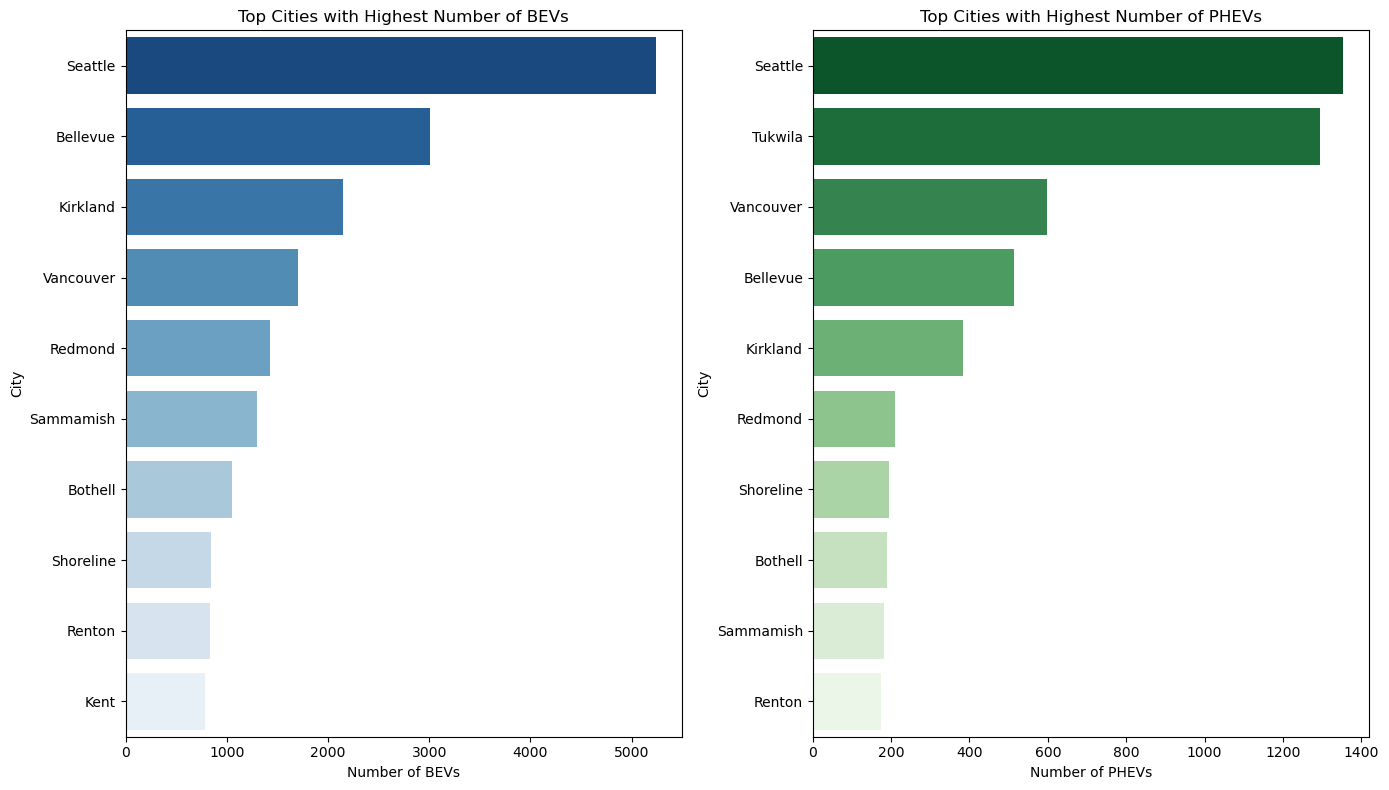

In [17]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot for Battery Electric Vehicles (BEV)
plt.subplot(1, 2, 1)
sns.barplot(x=top_cities_bev.values, y=top_cities_bev.index, palette='Blues_r')
plt.title('Top Cities with Highest Number of BEVs')
plt.xlabel('Number of BEVs')
plt.ylabel('City')

# Plot for Plug-in Hybrid Electric Vehicles (PHEV)
plt.subplot(1, 2, 2)
sns.barplot(x=top_cities_phev.values, y=top_cities_phev.index, palette='Greens_r')
plt.title('Top Cities with Highest Number of PHEVs')
plt.xlabel('Number of PHEVs')
plt.ylabel('City')

plt.tight_layout()
plt.show()

In [18]:
# Convert 'Model Year' to string if it's an integer type
data['Model Year'] = data['Model Year'].astype(str)

# Exclude rows where 'Model Year' is '2024'
data = data[data['Model Year'] != '2024']

In [19]:
# Grouping data by model year and counting the number of EVs for each year
ev_population_by_year = data.groupby('Model Year').size()

ev_population_by_year

Model Year
2000        1
2002        1
2008        1
2010        9
2011      139
2012      263
2013      797
2014      634
2015      885
2016     1043
2017     1571
2018     2821
2019     2070
2020     2263
2021     3610
2022     5462
2023    11808
dtype: int64

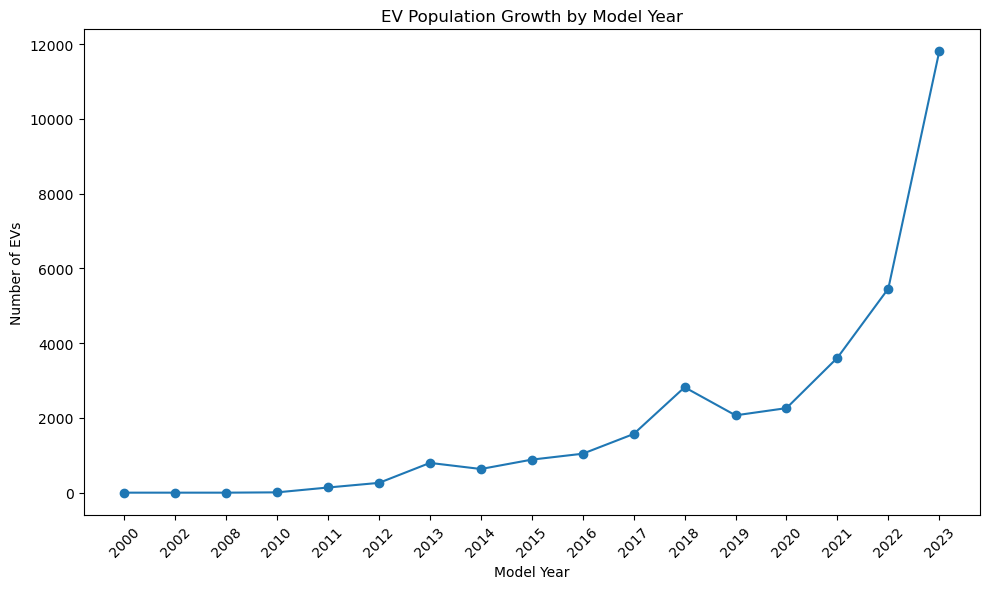

In [20]:
#EV Population Trend over the years
plt.figure(figsize=(10, 6))  # Remove facecolor parameter to set background color to normal
plt.plot(ev_population_by_year.index, ev_population_by_year.values, marker='o', linestyle='-')
plt.title('EV Population Growth by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.xticks(ev_population_by_year.index, rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [21]:
# Convert "Electric Vehicle Type" into dummy variables
dummy_df = pd.get_dummies(data["Electric Vehicle Type"], prefix="EV_Type")

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_df], axis=1)

# Drop the original "Electric Vehicle Type" column
data.drop("Electric Vehicle Type", axis=1, inplace=True)

# Display the updated DataFrame
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,EV_Type_Battery Electric Vehicle (BEV),EV_Type_Plug-in Hybrid Electric Vehicle (PHEV)
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,True,False
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10,True,False
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,True,False
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,True,False
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10,True,False


In [22]:
data.drop(["VIN (1-10)", "Postal Code", "Clean Alternative Fuel Vehicle (CAFV) Eligibility",
          "Legislative District", "Base MSRP", "DOL Vehicle ID",
          "Electric Utility", "2020 Census Tract"], axis=1, inplace=True)

In [23]:
# Split the "Vehicle Location" column into longitude and latitude
split_location = data['Vehicle Location'].str.strip('POINT ()').str.split(' ', expand=True)
data['Longitude'] = split_location[0]
data['Latitude'] = split_location[1]

# Drop the original "Vehicle Location" column
data.drop("Vehicle Location", axis=1, inplace=True)

In [25]:
# Convert Latitude and Longitude to float
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)

# Convert Model Year to year format
data['Model Year'] = pd.to_datetime(data['Model Year'], format='%Y').dt.year


In [26]:
data.head()

,County,City,State,Model Year,Make,Model,Electric Range,EV_Type_Battery Electric Vehicle (BEV),EV_Type_Plug-in Hybrid Electric Vehicle (PHEV),Longitude,Latitude
0,King,Seattle,WA,2020,TESLA,MODEL Y,291.0,True,False,-122.308390,47.610365
1,Snohomish,Bothell,WA,2023,TESLA,MODEL Y,0.0,True,False,-122.179458,47.802589
2,King,Seattle,WA,2019,TESLA,MODEL S,270.0,True,False,-122.348480,47.632405
3,King,Issaquah,WA,2016,TESLA,MODEL S,210.0,True,False,-122.036460,47.534065
4,Kitsap,Suquamish,WA,2021,TESLA,MODEL Y,0.0,True,False,-122.557170,47.733415


During data exploration and cleaning process, I examined summary statistics, checked for missing values, and visualized distributions of key variables and trend of EV population over the years. Data cleaning involved handling missing values, converting categorical variables (Vehicle Type) into dummy variables, and identifying and treating outliers if necessary. Feature engineering will involve creating interaction terms or polynomial features to capture nonlinear relationships.

# 3. Linear Regression Models


### LINEAR REGRESSION

In [29]:
# Filter out zero or negative values
data['Filtered_Electric_Range'] = data[data['Electric Range'] > 0]['Electric Range']

<Axes: >

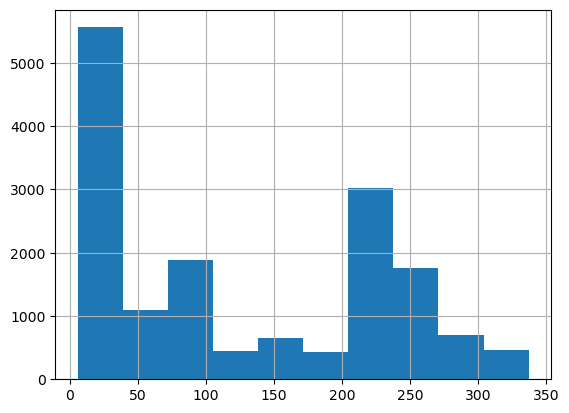

In [30]:
data['Filtered_Electric_Range'].hist()

In [41]:
from scipy.stats import boxcox

In [46]:
# Calculate the IQR
Q1 = data['Filtered_Electric_Range'].quantile(0.25)
Q3 = data['Filtered_Electric_Range'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Filtered_Electric_Range'] < lower_bound) | (data['Filtered_Electric_Range'] > upper_bound)]

# Remove outliers
cleaned_data = data[~((data['Filtered_Electric_Range'] < lower_bound) | (data['Filtered_Electric_Range'] > upper_bound))]

In [63]:
cleaned_data.isnull().sum()

County                                            0
City                                              0
State                                             0
Model Year                                        0
Make                                              0
Model                                             0
Electric Range                                    0
EV_Type_Battery Electric Vehicle (BEV)            0
EV_Type_Plug-in Hybrid Electric Vehicle (PHEV)    0
Longitude                                         0
Latitude                                          0
Filtered_Electric_Range                           0
dtype: int64

In [51]:
cleaned_data = cleaned_data.dropna(subset=['Filtered_Electric_Range'])

In [53]:
# Perform Box-Cox transformation
boxcox_ER, lam = boxcox(cleaned_data['Filtered_Electric_Range'])

# Display the lambda value
print("Lambda:", lam)

Lambda: 0.2247941416408938


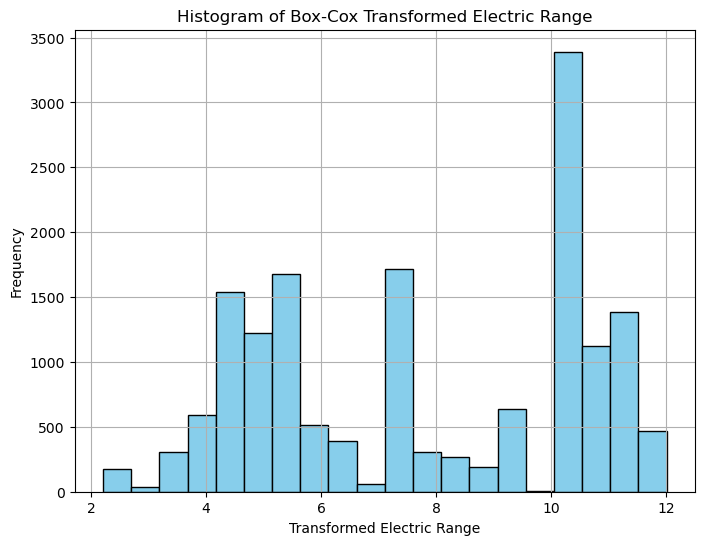

In [55]:
# Plot histogram of transformed data
plt.figure(figsize=(8, 6))
plt.hist(boxcox_ER, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Box-Cox Transformed Electric Range')
plt.xlabel('Transformed Electric Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [57]:
# Perform normality test
statistic, p_value = normaltest(boxcox_ER)

# Display the test statistic and p-value
print("Test Statistic:", statistic)
print("p-value:", p_value)

Test Statistic: 97384.12724877676
p-value: 0.0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [67]:
X = cleaned_data[['Longitude', 'Latitude', 'Model Year', 'EV_Type_Battery Electric Vehicle (BEV)',
          'EV_Type_Plug-in Hybrid Electric Vehicle (PHEV)']]

y = cleaned_data['Filtered_Electric_Range']  # 'Electric Range' is the target variable

In [68]:
X.shape

(16005, 5)

In [69]:
y.shape

(16005,)

In [70]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Create a linear regression model
model = LinearRegression()

In [72]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [103]:
# Calculate and print the R-squared value
r_squared = model.score(X_test, y_test)
print("Linear Regression R-squared:", r_squared)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Linear Regression RMSE:", rmse)

Linear Regression R-squared: 0.7364979481738515
Linear Regression RMSE: 40.748694066885555


### POLYNOMIAL REGRESSION

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [81]:
# Create polynomial features transformer
degree = 2  # Set the degree of the polynomial features
poly_features = PolynomialFeatures(degree=degree)

In [82]:
# Create a pipeline with polynomial features and linear regression
pipeline = make_pipeline(poly_features, LinearRegression())

In [83]:
# Fit the model on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [84]:
# Predict on the testing data
y_pred = pipeline.predict(X_test)

In [104]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

print("R-squared value with Polynomial Features:", r_squared)


# Calculate root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error with Polynomial Features (Degree", degree, "):", rmse)

R-squared value with Polynomial Features: 0.8319739796273965
Root Mean Squared Error with Polynomial Features (Degree 2 ): 40.748694066885555


### REGULARIZED REGRESSION

In [92]:
from sklearn.linear_model import Ridge

In [97]:
# Create and fit the Ridge Regression model
ridge_model = Ridge(alpha= 0.01)  # Set the regularization strength (alpha)
ridge_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_ridge = ridge_model.predict(X_test)

In [98]:
# Calculate root mean squared error
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("Root Mean Squared Error (Ridge Regression):", rmse_ridge)

# Calculate R-squared value
r_squared_ridge = ridge_model.score(X_test, y_test)
print("R-squared value (Ridge Regression):", r_squared_ridge)

Root Mean Squared Error (Ridge Regression): 51.02904250806788
R-squared value (Ridge Regression): 0.7364979546260112


In [100]:
from sklearn.linear_model import Lasso

In [101]:
# Create and fit the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # Set the regularization strength (alpha)
lasso_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_lasso = lasso_model.predict(X_test)

In [102]:
# Calculate root mean squared error
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print("Root Mean Squared Error (Lasso Regression):", rmse_lasso)

# Calculate R-squared value
r_squared_lasso = lasso_model.score(X_test, y_test)
print("R-squared value (Lasso Regression):", r_squared_lasso)

Root Mean Squared Error (Lasso Regression): 51.084199591916196
R-squared value (Lasso Regression): 0.7359280101955772


# 4. Insights and key findings


**Polynomial Features Regression Performance**
The regression model with polynomial features (degree 2) achieved a higher R-squared value (0.832) compared to simple linear regression (0.736). This implies that the polynomial features model explains a larger proportion of the variance in the target variable, suggesting a better fit to the data.

**Root Mean Squared Error (RMSE)**
The RMSE for both the polynomial features regression and simple linear regression is the same (40.748). This indicates that both models have similar accuracy in predicting the target variable on average. However, it's essential to consider the R-squared value as it provides information about the goodness of fit.

**Regularized Regression (Ridge and Lasso)**
The regularized regression techniques (Ridge and Lasso) did not perform as well as the polynomial features regression or simple linear regression in terms of R-squared value and RMSE. This suggests that in this particular scenario, regularization might not be necessary or beneficial.

1. The inclusion of polynomial features, particularly with a degree of 2, significantly improved the model's performance compared to simple linear regression.
2. The dataset might exhibit nonlinear relationships between predictors and the target variable, which are captured more effectively by the polynomial features model.
3. Ridge and Lasso regression techniques did not provide significant improvements over simple linear regression, indicating that the regularization might not be essential for this dataset or that the penalty parameters were not optimized effectively.
4. Further feature engineering or exploration could enhance the model's performance, potentially by considering interactions between variables or including additional relevant features.

# 5. Next Steps


1. Further explore the data to identify additional features or patterns that could improve the model's performance.
2. Experiment with different degrees of polynomial features or other nonlinear regression techniques to potentially achieve even better results.
3. Evaluate the model's performance on unseen data (e.g., using cross-validation) to ensure its generalizability.
4. Consider ensemble methods or other advanced modeling techniques to further enhance predictive performance.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
